In [1]:
import numpy as np
# from tqdm import tqdm
from matplotlib import pyplot as plt
from kalman_bucy import kalman_bucy


This notebook contains an example of how to use the kalman_bucy function

In [2]:
def EM(x0, T = 100, timesteps = 10000, c = 10):
    delta_t = T/timesteps
    rho = 28
    beta = 8/3
    sigma = 10
    final = np.zeros((timesteps,3))
    final[0] = x0
    for i in range(timesteps-1):
        final[i+1, 0] = final[i,0] + delta_t*(sigma*(final[i,1]-final[i,0]))
        final[i+1, 1] = final[i,1] + delta_t*(final[i,0]*(rho - final[i,2])-final[i,1]) + c*np.random.normal(0,np.sqrt(delta_t))
        final[i+1, 2] = final[i,2] + delta_t*(final[i,0]*final[i,1]-beta*final[i,2])

    return final

sol = EM([0,1,0])
x = sol[:,0]
y = sol[:,1]
z = sol[:,2]

In [3]:
len(x)

10000

(2,) (2, 2)


RK4 Kalman–Bucy:   0%|          | 0/9999 [00:00<?, ?it/s]/Users/lydiatolman/Desktop/Research/DA/data_assimilation/kalman_bucy/utils.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  J[:, i] = diff.flatten()
RK4 Kalman–Bucy: 100%|██████████| 9999/9999 [00:01<00:00, 6614.83it/s]


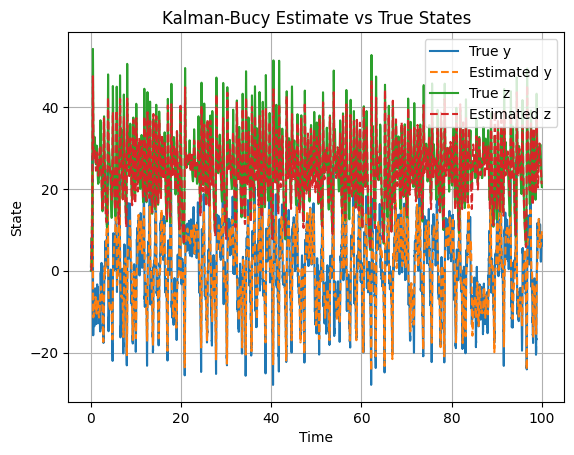

In [4]:
import numpy as np
from kalman_bucy import kalman_bucy

def f_uI(t, uI, uII):
    # uI is the state of the observed variable (x)
    sigma = 10
    return sigma * (uII[0] - uI)

def f_uII(t, uI, uII):
    # uII is the state of the unobserved variables (y, z)
    rho, beta = 28, 8 / 3
    y, z = uII
    x = uI
    return np.array([
        -y - x * z + rho * x,
        x * y - beta * z
    ])

# Simulation parameters
T = 100
t_span = (0, T)
n = len(x)
# uI = x.copy().reshape(n,1)
uI = x.copy()
t =  np.linspace(t_span[0], t_span[1], n)


# Run Kalman-Bucy filter
results = kalman_bucy(
    d_uI=f_uI,
    d_uII=f_uII,
    t_span=t_span,
    uI=uI,
    uII_0=np.array([1, 0]),
    R0=.5*np.eye(2),
    SigmaI=np.array([[1]]),
    SigmaII=np.diag([0.1, 0.1]),
)

# Access results
uII_est = results["uII"]
t_vals = results["t"]


plt.plot(t_vals, y, label="True y")
plt.plot(t_vals, uII_est[0], '--', label="Estimated y")
plt.plot(t_vals, z, label="True z")
plt.plot(t_vals, uII_est[1], '--', label="Estimated z")
plt.xlabel("Time")
plt.ylabel("State")
plt.legend()
plt.title("Kalman-Bucy Estimate vs True States")
plt.grid()
plt.show()


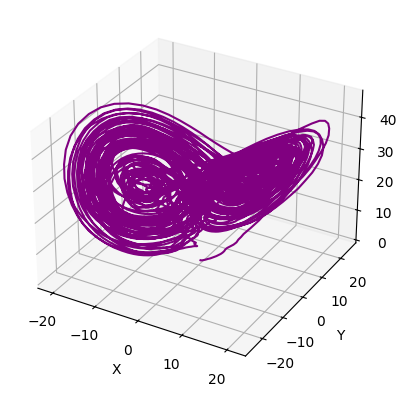

In [5]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(x,uII_est[0],uII_est[1], 'purple')
ax.set_xlabel('X')
ax.set_zlabel('Z')
plt.ylabel('Y')
plt.show()